<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Plotting (Good)</span></div>

## 1 Comparing the two ‘dialects’

### 1.1 Some nomenclature

a figure can have multiple axes


### 1.2 We need some data.

In [4]:
from matplotlib import pyplot as plt

### 1.3 Here comes the comparison

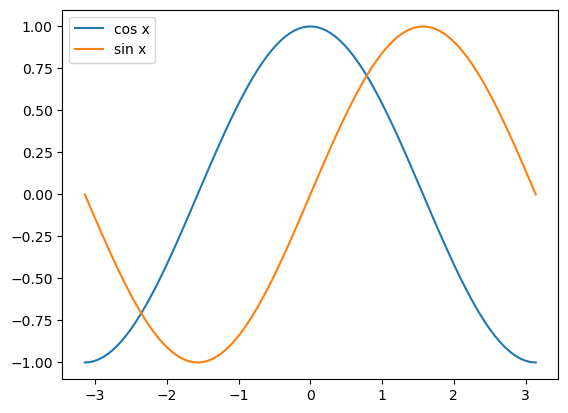

In [5]:
#---pyplot---

x = np.linspace(-np.pi, np.pi, num=100)
cos_x = np.cos(x)
sin_x = np.sin(x)

plt.plot(x, cos_x, label='cos x')
plt.plot(x, sin_x, label='sin x')
plt.legend()
plt.show()

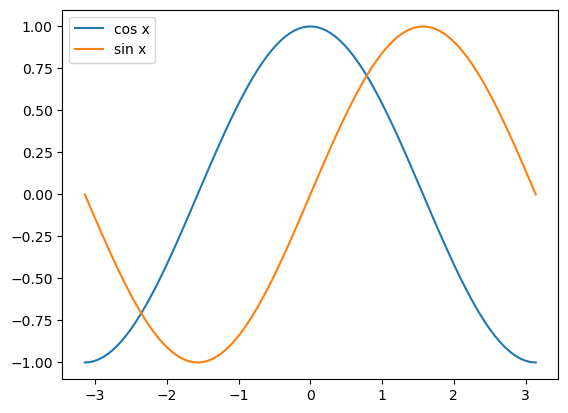

In [8]:
#---OO---

x = np.linspace(-np.pi, np.pi, num=100)
cos_x = np.cos(x)
sin_x = np.sin(x)

fig, ax = plt.subplots(nrows=1, ncols=1)
# nrows=2 and ncols=2 gives 4 axes (2x2 'grid')
ax.plot(x, cos_x, label='cos x')
ax.plot(x, sin_x, label='sin x')
ax.legend()
plt.show()

## 2 Using the OO Interface

### 2.1 Getting ax

### 2.2 What is ax

In [14]:
print(type(ax))
print(ax.shape)
# (2,) means there are 2 arrays that are empty ([[][]])
type(ax[0])

<class 'numpy.ndarray'>
(2,)


matplotlib.axes._subplots.AxesSubplot

### 2.3 Plots in a column

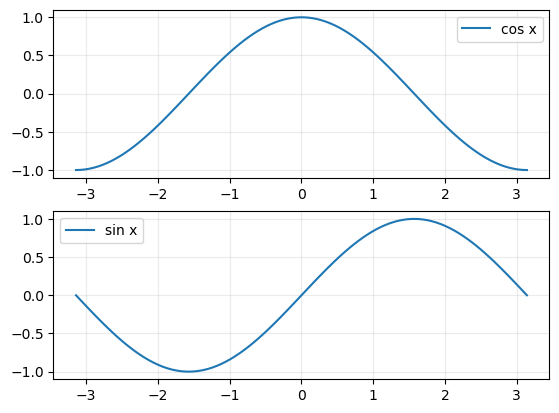

In [16]:
x = np.linspace(-np.pi, np.pi, num=100)
cos_x = np.cos(x)
sin_x = np.sin(x)

fig, ax = plt.subplots(ncols=1, nrows=2)

ax[0].plot(x, cos_x, label='cos x')
#ax[0].legend()
ax[1].plot(x, sin_x, label='sin x')
#ax[1].legend()
for a in ax:
    a.legend()
for a in ax:
    a.legend()
    a.grid(alpha=.25)

### 2.4 Legends

### 2.5 Tweaks

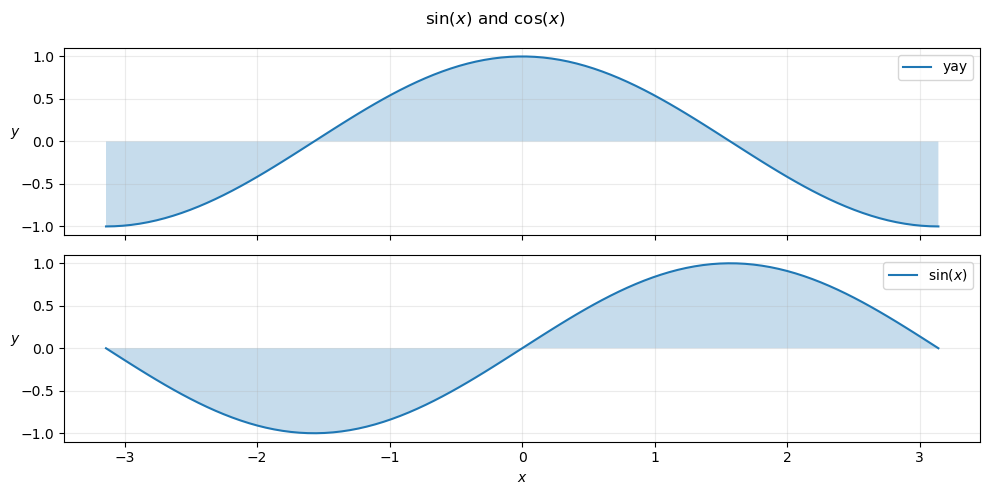

In [19]:
x = np.linspace(-np.pi, np.pi, num=100)
cos_x = np.cos(x)
sin_x = np.sin(x)

fig, ax = plt.subplots(nrows=2, ncols=1,
                       figsize=(10, 5),   # 10 x 5 inches!
                       sharex=True)
ax[0].plot(x, cos_x, label=r'$\cos(x)') # same result without dollar signs for legends
ax[0].fill_between(x, 0, cos_x, alpha=.25)
ax[1].plot(x, sin_x, label=r'$\sin(x)$')
ax[1].fill_between(x, 0, sin_x, alpha=.25)

for a in ax:  # makes applicable for all axes
    a.legend()
    a.grid(alpha=.25)
    a.set_ylabel('$y$', rotation=0)

ax[1].set_xlabel('$x$')

fig.suptitle(r'$\sin(x)$ and $\cos(x)$')
fig.tight_layout()

plt.show()

## 3 More rows and columns

### 3.1 Using ax

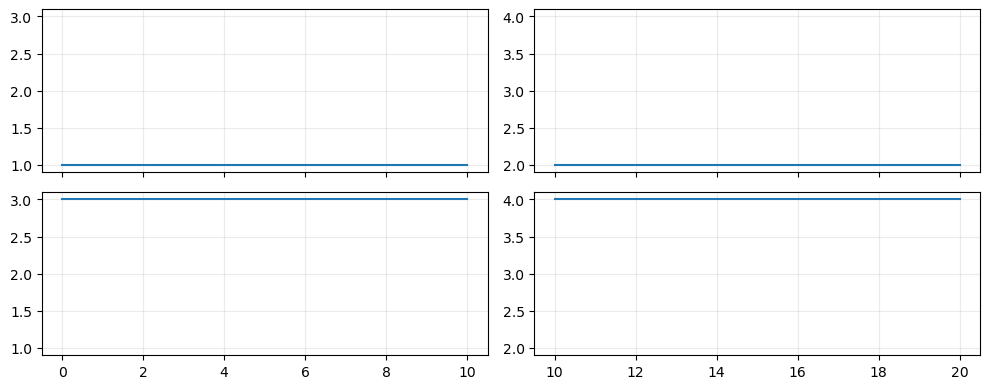

In [23]:
fig, ax = plt.subplots(nrows=2, ncols=2,
                       figsize=(10, 4),
                       sharex='col', sharey='col')

top_left, top_right, bottom_left, bottom_right = ax.flatten()
# Some variables to access the axes and improve readabilty
# naming makes it easier to know which axis youre working on
# flatten - instead of ([0,0], [0,1]...), it sort of becomes [0,1,2,3] so easier to work on

x1 = np.linspace(0, 10, 100)
x2 = np.linspace(10, 20, 100)

top_left.plot(x1, np.ones_like(x1))
top_right.plot(x2, 2*np.ones_like(x2))
bottom_left.plot(x1, 3*np.ones_like(x1))
bottom_right.plot(x2, 4**np.ones_like(x2))
# ones_like when plotting creates a straight line within a specified range

for a in ax.flatten():
    a.grid(alpha=.25)

plt.tight_layout()
plt.show()


### 3.2 Sharing axes

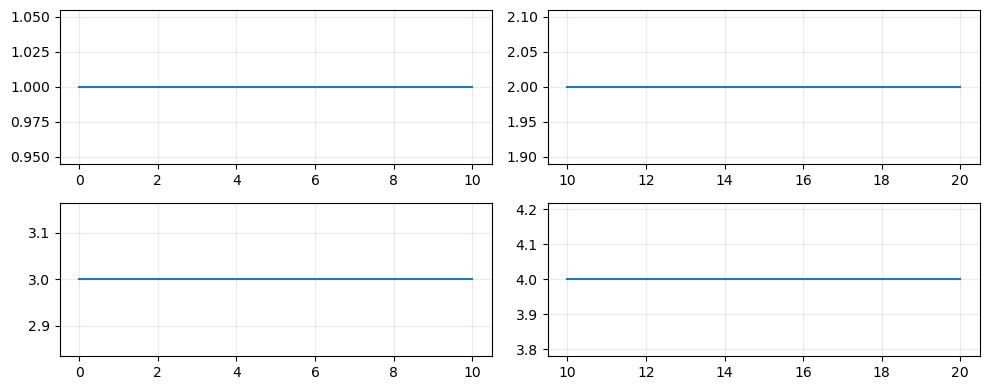

In [26]:
fig, ax = plt.subplots(nrows=2, ncols=2,
                       figsize=(10, 4))
                       #,sharex='col', sharey='col')

top_left, top_right, bottom_left, bottom_right = ax.flatten()

# x data for plotting
x1 = np.linspace(0, 10, 100)
x2 = np.linspace(10, 20, 100)

top_left.plot(x1, np.ones_like(x1))
top_right.plot(x2, 2*np.ones_like(x2))
bottom_left.plot(x1, 3*np.ones_like(x1))
bottom_right.plot(x2, 4**np.ones_like(x2))

for a in ax.flatten():
    a.grid(alpha=.25)

plt.tight_layout()
plt.show()


### 3.3 Accessing all axes

In [ ]:

# Your code here


## 4 Other useful plots

### 4.1 Histograms

In [ ]:

# Your code here


### 4.2 Scatter plots

In [ ]:

# Your code here


### 4.3 Bar charts

In [ ]:

# Your code here


### 4.4 Pie charts

In [ ]:

# Your code here


## Exercise 1 :  Plotting data from files

In [ ]:



# Your solution here


